#### Importing the libraries

In [1]:
import numpy as np
import warnings
from scipy import stats
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### Read data and get the necessary information

In [2]:
data=pd.read_csv("../data/scraped/all_data_scraped.csv")
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\r\n\r\nV\r\n\r\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\r\ncisco\r\n\r\n» wo Product Edition...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4672,http://safetycovertouse2216843.click/,2964041,16579836,8821425,14606820,3158576,5463658,15922162,6119261,The IP address has changed.\r\nThe IP address ...,no_brand,1
4673,http://5fgfgfgfg4g4gdfg3.blogspot.co.ke/,16711422,15856371,3765738,11317945,2040100,6184802,14540510,9942771,Lqseuu Facebook\r\n\r\nAlwavsannislay lnsawvin...,no_brand,1
4674,https://shandongyongwang.com/shipping/login/in...,16579572,16240975,6735994,394501,11221039,1645082,11378058,12567752,Q Suche\r\n\r\nPortal Logins\r\n\r\nDHLT RACKI...,no_brand,1
4675,http://mjlmengineering.com/,16711422,1908245,4693462,4672795,7628841,4156464,2438178,2040100,= F :\r\nSS AT&T Website Solutions\r\n\r\nLge ...,AT&T,1


In [3]:
data.shape

(4677, 12)

In [4]:
data.describe()

,color1,color2,color3,color4,color5,color6,color7,color8,status
count,4.677000e+03,4.677000e+03,4.677000e+03,4.677000e+03,4.677000e+03,4.677000e+03,4.677000e+03,4.677000e+03,4677.000000
mean,1.439029e+07,7.621912e+06,7.856735e+06,7.353563e+06,7.140040e+06,7.208330e+06,7.274961e+06,7.203772e+06,0.636519
std,4.931655e+06,6.393933e+06,5.025223e+06,4.678924e+06,5.323431e+06,5.382009e+06,5.319556e+06,5.321465e+06,0.481053
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.585611e+07,1.777707e+06,3.356475e+06,3.699167e+06,2.040100e+06,2.237731e+06,2.171429e+06,2.432280e+06,0.000000
50%,1.664563e+07,5.063748e+06,7.307415e+06,6.316128e+06,6.904143e+06,6.394311e+06,7.447248e+06,6.838867e+06,1.000000
75%,1.671142e+07,1.546239e+07,1.092009e+07,1.098588e+07,1.124802e+07,1.247599e+07,1.131508e+07,1.164668e+07,1.000000
max,1.677722e+07,1.677722e+07,1.677696e+07,1.677722e+07,1.671168e+07,1.671168e+07,1.671168e+07,1.671168e+07,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URL         4677 non-null   object
 1   color1      4677 non-null   int64 
 2   color2      4677 non-null   int64 
 3   color3      4677 non-null   int64 
 4   color4      4677 non-null   int64 
 5   color5      4677 non-null   int64 
 6   color6      4677 non-null   int64 
 7   color7      4677 non-null   int64 
 8   color8      4677 non-null   int64 
 9   text        4511 non-null   object
 10  brand_name  4677 non-null   object
 11  status      4677 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 438.6+ KB


#### Null values

In [6]:
data.isnull().any()

URL           False
color1        False
color2        False
color3        False
color4        False
color5        False
color6        False
color7        False
color8        False
text           True
brand_name    False
status        False
dtype: bool

In [7]:
data.isnull().sum()

URL             0
color1          0
color2          0
color3          0
color4          0
color5          0
color6          0
color7          0
color8          0
text          166
brand_name      0
status          0
dtype: int64

In [8]:
#removing null values
data=data.dropna().reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\r\n\r\nV\r\n\r\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\r\ncisco\r\n\r\n» wo Product Edition...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4506,http://safetycovertouse2216843.click/,2964041,16579836,8821425,14606820,3158576,5463658,15922162,6119261,The IP address has changed.\r\nThe IP address ...,no_brand,1
4507,http://5fgfgfgfg4g4gdfg3.blogspot.co.ke/,16711422,15856371,3765738,11317945,2040100,6184802,14540510,9942771,Lqseuu Facebook\r\n\r\nAlwavsannislay lnsawvin...,no_brand,1
4508,https://shandongyongwang.com/shipping/login/in...,16579572,16240975,6735994,394501,11221039,1645082,11378058,12567752,Q Suche\r\n\r\nPortal Logins\r\n\r\nDHLT RACKI...,no_brand,1
4509,http://mjlmengineering.com/,16711422,1908245,4693462,4672795,7628841,4156464,2438178,2040100,= F :\r\nSS AT&T Website Solutions\r\n\r\nLge ...,AT&T,1


In [9]:
data.shape

(4511, 12)

#### class distribution

In [10]:
data['status'].value_counts()

1    2824
0    1687
Name: status, dtype: int64

<AxesSubplot: xlabel='status', ylabel='count'>

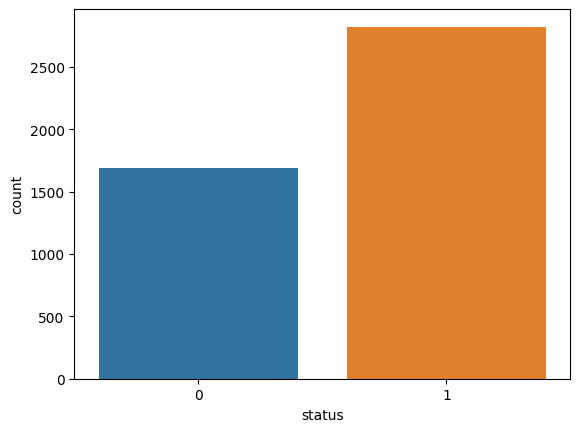

In [11]:
sns.countplot(x=data['status'])

#### total unique values for each feature

In [12]:
data.nunique(axis=0,dropna=True)

URL           3142
color1         920
color2        1771
color3        2003
color4        2088
color5        2176
color6        2188
color7        2172
color8        2143
text          3058
brand_name      11
status           2
dtype: int64

#### duplicated rows

In [13]:
url_dup=data[data.duplicated()]

In [14]:
url_dup

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
1500,http://searchnetworking.techtarget.com/definit...,16316664,5287850,4092812,6776679,3289650,5413524,10461087,13691368,TechTarget Network Unified Communications Mobi...,no_brand,0
1502,http://www.columbusonlineauctions.com/cgi-bin/...,16711422,3818574,5020625,12314107,4671303,14320487,16106820,9763918,Server Error\r\n\r\n404\r\n\r\nPage Not Found\...,no_brand,0
1503,http://www.zamzar.com/uploadComplete.php?conve...,16382457,15726074,5478882,4030172,2171169,3105214,5481553,6316128,> ZAMZAR° API FORMATS MY FILES CONVERTERS PRIC...,no_brand,0
1504,http://www.1948.org.uk/un-resolution-181/,3946809,6126129,6498870,15000804,10855580,14875854,13949025,9933134,HOME ABOUTUS MAPS GOOGLE EARTH GALLERY SOURCES...,no_brand,0
1507,http://paulbourke.net/geometry/pointlineplane/,16711422,263172,10724259,6250335,197540,15198198,6316229,9276886,"Points, lines, and planes\r\n\r\nIn what follo...",no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4078,http://0ed874b.wcomhost.com/banking-postbank/l...,16711422,263172,10658466,6184542,0,0,0,0,Forbidden\r\n\r\nYou don't have permission to ...,no_brand,1
4079,http://0ed874b.wcomhost.com/banking-postbank/l...,16711422,394758,10592673,6184542,0,0,0,0,404: Page not found\r\nThis error is generated...,no_brand,1
4080,http://0ed874b.wcomhost.com/banking-postbank/l...,16711422,263172,10658466,6184542,0,0,0,0,Forbidden\r\n\r\nYou don't have permission to ...,no_brand,1
4081,http://i-am-lost-for-words.tk/e-file.html,16316664,4868425,3170230,1318443,1776153,5576290,15355431,14214384,| Microsoft | Microsoft 365 OneDrive Business ...,Microsoft,1


In [15]:
u=url_dup['URL']
u

1500    http://searchnetworking.techtarget.com/definit...
1502    http://www.columbusonlineauctions.com/cgi-bin/...
1503    http://www.zamzar.com/uploadComplete.php?conve...
1504            http://www.1948.org.uk/un-resolution-181/
1507       http://paulbourke.net/geometry/pointlineplane/
                              ...                        
4078    http://0ed874b.wcomhost.com/banking-postbank/l...
4079    http://0ed874b.wcomhost.com/banking-postbank/l...
4080    http://0ed874b.wcomhost.com/banking-postbank/l...
4081            http://i-am-lost-for-words.tk/e-file.html
4082    http://0ed874b.wcomhost.com/banking-postbank/l...
Name: URL, Length: 1039, dtype: object

In [16]:
data=data.drop_duplicates(subset='URL', keep="first").reset_index(drop=True)
data

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,no_brand,0
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,no_brand,0
2,http://seanorr.tumblr.com,16645616,7822838,1644825,7626058,11118241,399411,15065593,15220016,"Don't, Dad.\r\n\r\nI cannot wait for a mediaev...",no_brand,0
3,https://nudemilitarygirls.tumblr.com/#_=_,15592941,399411,10188973,13285844,4543078,5616885,6212431,723465,t Q Search Tumblr\r\n\r\nV\r\n\r\nUntitled,no_brand,0
4,https://duosecurity.com,16645629,14410725,6316128,3619904,10197915,8502112,5857896,1973790,stftenfae\r\ncisco\r\n\r\n» wo Product Edition...,no_brand,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,http://safetycovertouse2216843.click/,2964041,16579836,8821425,14606820,3158576,5463658,15922162,6119261,The IP address has changed.\r\nThe IP address ...,no_brand,1
3138,http://5fgfgfgfg4g4gdfg3.blogspot.co.ke/,16711422,15856371,3765738,11317945,2040100,6184802,14540510,9942771,Lqseuu Facebook\r\n\r\nAlwavsannislay lnsawvin...,no_brand,1
3139,https://shandongyongwang.com/shipping/login/in...,16579572,16240975,6735994,394501,11221039,1645082,11378058,12567752,Q Suche\r\n\r\nPortal Logins\r\n\r\nDHLT RACKI...,no_brand,1
3140,http://mjlmengineering.com/,16711422,1908245,4693462,4672795,7628841,4156464,2438178,2040100,= F :\r\nSS AT&T Website Solutions\r\n\r\nLge ...,AT&T,1


In [17]:
data.nunique(axis=0,dropna=True)

URL           3142
color1         898
color2        1750
color3        1963
color4        2044
color5        2132
color6        2151
color7        2136
color8        2110
text          2773
brand_name      11
status           2
dtype: int64

### Work with the 'text' feature

#### Getting the general idea of the type of texts we will be dealing with, since the total unique values in dataset for 'text' is NOT the total rows. Which says that it needs some work.

In [19]:
data.nunique()

URL           3142
color1         898
color2        1750
color3        1963
color4        2044
color5        2132
color6        2151
color7        2136
color8        2110
text          2773
brand_name      11
status           2
dtype: int64

In [20]:
data['text'].value_counts()

Page not found\r\n\r\nBack to homepage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [21]:
# created a dataframe to make it look cleaner
ty=pd.DataFrame(data=data['text'].value_counts().sort_values(ascending=False))

In [22]:
# counts=1 means that the web page scraped might be valid and working. so removing those
ty=ty.loc[ty['text'] != 1]

#### Removing texts with counts more than 1. This has been analysed thoroughly, and they really are different types of errors only.

In [23]:
rem_index = []
for i in range(len(ty)):
    common_loc = data.loc[data['text'] == ty.index[i]]
    for j in range(len(data)):
        if data['text'][j] == ty.index[i]:
            rem_index.append(j)
    del common_loc 
len(rem_index)

481

In [24]:
data=data.drop(labels=rem_index,axis=0)
data=data.reset_index(drop=True)

In [25]:
data.nunique()

URL           2661
color1         874
color2        1699
color3        1898
color4        1972
color5        2066
color6        2074
color7        2077
color8        2046
text          2661
brand_name      11
status           2
dtype: int64

#### Removing texts with error messages.

In [26]:
bad_pages = []
bad_pattern = r"Site Not Found|This page isn’t working|Internal Server Error|This page isn’t working|Your connection is not private|404"
for i in range(len(data)):
    if re.match(bad_pattern, data['text'][i], flags=re.IGNORECASE):
        bad_pages.append(i)
len(bad_pages)

58

In [27]:
temp = data[data.index.isin(bad_pages)]
temp

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,brand_name,status
15,http://galanteriafutrzana.pl/gfx/mail.live-pdf...,16711422,16119543,6448488,3699167,10133674,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
86,https://admindocusgn11-secondary.z13.web.core....,16711422,16119543,6382696,3699167,10199210,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
215,http://xmlgrid.net/xml2text.html,16711422,16119544,3699167,6448488,10133675,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,0
448,https://www.motorzona.ru/,16711422,16119543,6448488,3699167,10133675,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,0
522,http://rakuten.co.jp.k3kngroeniu4lkdsbnhoirteh...,16711422,16119543,6382696,3699167,10133673,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
544,http://preventppal.xyz/,16711422,16119544,6448232,3699167,10133675,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
569,http://yvddgk.gq/b/ver.php?e=adevins@prepaidle...,16711422,16119544,3699167,6448232,10133674,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
652,http://www.afritraders.com/include/googledrive...,16711422,16119543,6448488,3699167,10133674,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,1
703,https://bunkr.ru,16711422,16119544,3699167,6448232,10133675,13193023,2171429,8083025,Your connection is not private\r\n\r\nAttacker...,no_brand,0
773,http://livewild.co/cgi/home/auth/Logging_in.php,12247015,16711422,3894650,6730438,10800084,6000540,16514557,0,"404 - Not found\r\n\r\nWe searched the space, ...",no_brand,1


In [28]:
temp = temp.reset_index(drop=True)

In [29]:
# Just for info. There indeed is a url with apple as a brand name.
(temp['brand_name']).value_counts()

no_brand    58
Name: brand_name, dtype: int64

In [30]:
data=data.drop(labels=bad_pages,axis=0)
data=data.reset_index(drop=True)

In [31]:
data.shape

(2603, 12)

### Label Balance after removing some failed pages

<AxesSubplot: xlabel='status', ylabel='count'>

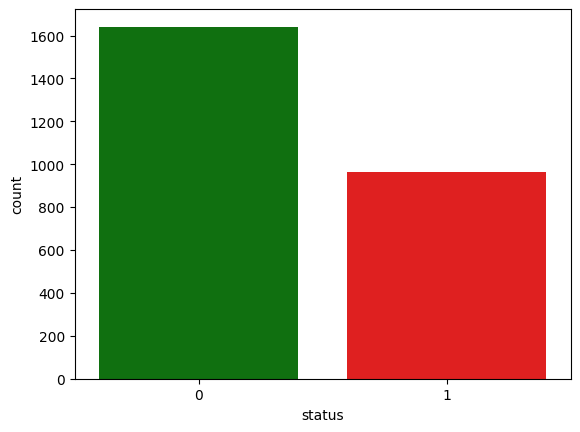

In [32]:
sns.countplot(x=data['status'], palette=['green', 'red'])

### Exploring brand_names col

In [33]:
data['brand_name'].value_counts()

no_brand     2469
Microsoft      92
Apple          13
Amazon         12
AT&T            9
Intuit          2
Netflix         2
Zoom            1
Xerox           1
Linkedin        1
Walmart         1
Name: brand_name, dtype: int64

In [146]:
# looks like there might be some use of this column

In [34]:
one_hot = pd.get_dummies(data.brand_name)

In [35]:
one_hot.head(1)

,AT&T,Amazon,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,no_brand
0,0,0,0,0,0,0,0,0,0,0,1


Adding one hot back to df

In [36]:
data = pd.concat([data, one_hot], axis=1)

In [37]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Amazon,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,no_brand
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,1


Dropping brand_name col since it is now one hot encoded, dropping no_brand column for redudancy, since 0 on all other brands means no_brand

In [38]:
data = data.drop(['brand_name', 'no_brand'], axis=1)

In [39]:
data.head(1)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,AT&T,Amazon,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,0,0


### Exploring new features based on URL

In [40]:
from urllib.parse import urlparse

def get_top_level_domain(url):
    tld = urlparse(url)
    return tld.netloc
    
tester = get_top_level_domain('http://daniel.com/wp-content/themes/theretailer/inc/addons/login/customer_center/customer-IDPP00C672/myaccount/signin/?country.x=LU&amp;locale.x=en_LU')

In [41]:
# new feature candidate 1
def get_url_len(url_str):
    return len(url_str)

In [42]:
get_url_len(tester)

10

In [43]:
# new feature candidate 2: Character sequence probability
# This is done using a character bigram model
# tried to make this self documenting
import nltk
import math

def get_english_char_bigram_probs():
    words = nltk.corpus.words.words('en') # loading in a corpus of words
    bg_cnts = {}
    ung_cnts = {}
    # going through each word in the corpus
    for word in words:
        padding = ' ' # needed for bigram models
        word = padding + word.lower() + padding
        # getting characters
        chars = [c for c in word]
        bgs = nltk.bigrams(chars) # getting bigrams
        
        # adding bigram to counts dictionary
        for bigram in bgs:
            bg_cnts[bigram] = bg_cnts[bigram] + 1 if bigram in bg_cnts else 1
            
        #adding unigram to count dictionary
        for unigram in chars:
            ung_cnts[unigram] = ung_cnts[unigram] + 1 if unigram in ung_cnts else 1
    
    # turning each count into a probability (MLE)
    for k, v in bg_cnts.items():
        first_word, _ = k
        denom = ung_cnts[first_word]
        bg_cnts[k] = v/denom # now it is a conditional probability
        
    # same for unigrams
    norm = sum(ung_cnts.values())
    for k, v in ung_cnts.items():
        ung_cnts[k] = v/norm

    return bg_cnts, ung_cnts
    
bg_probs, ung_probs = get_english_char_bigram_probs()
bg_probs[('e', 'n')] # for example 

0.10653080129689671

In [44]:
def get_score(ung_probs, bg_probs, url_str):
    url_chars = [c for c in url_str]
    url_bgs = nltk.bigrams(url_chars)
    
    # getting a score of each url char bigram
    score = 0
    for bigram in url_bgs:
        # using linear interpolatation smoothing in negative log space to prevent underflow (lambda 0.5)
        first_word, _ = bigram
        score += 0.5*bg_probs.get(bigram, 0) + 0.5*ung_probs.get(first_word, 0)
        # TODO probably should do entropy here
    return score
get_score(ung_probs, bg_probs, tester)

0.5483671288246614

In [45]:
bg_probs, ung_probs = get_english_char_bigram_probs()

url_lens = []
url_scores = []
for url in data['URL']:
    tld = get_top_level_domain(url)
    l = get_url_len(tld)
    score = get_score(ung_probs, bg_probs, tld)
    url_lens.append(l)
    url_scores.append(score)

In [46]:
# adding new features to data
data['url_len'] = url_lens
data['tld_char_score'] = url_scores

In [47]:
data.head(2)

,URL,color1,color2,color3,color4,color5,color6,color7,color8,text,...,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,url_len,tld_char_score
0,http://www.softpedia.com/get/System/File-Manag...,16711422,796270,15856631,8293803,6453935,4283033,8309095,1258376,SOFTPEDIA’ PAID yaa 6@& MACAPPS = & LINUX APPS...,...,0,0,0,0,0,0,0,0,17,0.683042
1,http://www.destroyalllines.com/,16579832,2233100,7952959,11574394,5287396,721412,9668189,14078345,CURRENT TOURS PAST TOURS AGENCY ABOUT MERCH MA...,...,0,0,0,0,0,0,0,0,23,1.388078


In [161]:
# splitting for corr checking

In [48]:
y = data['status']
X = data.drop(['status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Checking correlations between features

In [49]:
abs(X_train.corr())

C:\Users\asus_\AppData\Local\Temp\ipykernel_28852\3642790581.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corr())


,color1,color2,color3,color4,color5,color6,color7,color8,AT&T,Amazon,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,url_len,tld_char_score
color1,1.000000,0.144540,0.124473,0.098092,0.116243,0.027590,0.035944,0.025179,0.032602,0.016102,0.023532,0.012391,0.010934,0.071611,0.023822,0.010166,0.010934,NaN,0.092459,0.070874
color2,0.144540,1.000000,0.164674,0.133138,0.018690,0.036498,0.012314,0.007469,0.004929,0.015028,0.022154,0.004994,0.020119,0.100950,0.015974,0.017433,0.021887,NaN,0.050739,0.050991
color3,0.124473,0.164674,1.000000,0.013618,0.009567,0.007790,0.009079,0.009201,0.041461,0.000551,0.000611,0.021320,0.032799,0.131477,0.008354,0.003442,0.029895,NaN,0.034631,0.000635
color4,0.098092,0.133138,0.013618,1.000000,0.062022,0.076487,0.084182,0.087159,0.001684,0.014891,0.024668,0.014931,0.018658,0.011271,0.017694,0.014453,0.001719,NaN,0.038730,0.019198
color5,0.116243,0.018690,0.009567,0.062022,1.000000,0.154517,0.206931,0.151975,0.010746,0.002848,0.013125,0.005125,0.018783,0.047412,0.009930,0.017617,0.025419,NaN,0.008909,0.009585
color6,0.027590,0.036498,0.007790,0.076487,0.154517,1.000000,0.210007,0.185801,0.037964,0.001123,0.023106,0.015554,0.011766,0.090771,0.003882,0.002567,0.008125,NaN,0.023033,0.025369
color7,0.035944,0.012314,0.009079,0.084182,0.206931,0.210007,1.000000,0.212265,0.013733,0.033867,0.037475,0.015559,0.003100,0.041081,0.011084,0.020637,0.007310,NaN,0.011473,0.007974
color8,0.025179,0.007469,0.009201,0.087159,0.151975,0.185801,0.212265,1.000000,0.013419,0.001151,0.021457,0.010335,0.018349,0.029002,0.015935,0.024182,0.022351,NaN,0.001020,0.012326
AT&T,0.032602,0.004929,0.041461,0.001684,0.010746,0.037964,0.013733,0.013419,1.000000,0.004457,0.004067,0.001816,0.001284,0.012127,0.001816,0.001284,0.001284,NaN,0.006833,0.002343
Amazon,0.016102,0.015028,0.000551,0.014891,0.002848,0.001123,0.033867,0.001151,0.004457,1.000000,0.004699,0.002098,0.001483,0.014012,0.002098,0.001483,0.001483,NaN,0.019957,0.014127


In [164]:
# All the colors seem highly correleated, URL features are too

Checking correleation with target (training data)

In [50]:
abs(X_train.corrwith(y_train))

C:\Users\asus_\AppData\Local\Temp\ipykernel_28852\2725760261.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(X_train.corrwith(y_train))


color1            0.102193
color2            0.040084
color3            0.031106
color4            0.051859
color5            0.050931
color6            0.092323
color7            0.100252
color8            0.103922
AT&T              0.067075
Amazon            0.029968
Apple             0.004337
Intuit            0.007998
Linkedin          0.015773
Microsoft         0.152270
Netflix           0.038308
Walmart           0.027082
Xerox             0.015773
Zoom                   NaN
url_len           0.296742
tld_char_score    0.241273
dtype: float64

In [166]:
# Colors definitely matter more than brand names

Visualizing RGB features, are they separable?

In [51]:
# dropping non-numeric features
X_train = X_train.drop(['URL', 'text'], axis=1)

In [52]:
X_train.head(2)

,color1,color2,color3,color4,color5,color6,color7,color8,AT&T,Amazon,Apple,Intuit,Linkedin,Microsoft,Netflix,Walmart,Xerox,Zoom,url_len,tld_char_score
1228,15725044,16711422,3765481,6665539,1908514,9608627,6053473,9942253,0,0,0,0,0,0,0,0,0,0,12,0.538519
764,16711422,1382947,5000268,4342853,2434083,2778088,4606023,10526880,0,0,0,0,0,0,0,0,0,0,7,0.344624


In [53]:
set(y_train)

{0, 1}

In [54]:
type(y_train)

y_train

1228    0
764     0
1075    0
2420    1
1637    0
       ..
1638    0
1095    0
1130    0
1294    1
860     0
Name: status, Length: 2342, dtype: int64